# Visualization of education levels and wages per country

### Manuel Petschinger - 12026023

## 1. Data and Preprocessing

The dataset is from OECD, available at https://data-explorer.oecd.org.

In [1]:
import pandas as pd

# Read the financial features
oecd_data = pd.read_csv('oecd_data.csv')

# Use only the columns LOCATION, INDICATOR, SUBJECT, MEASURE, TIME_PERIOD and OBS_VALUE
oecd_data = oecd_data[['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'TIME_PERIOD', 'OBS_VALUE']].copy()

# Filter the data on INDICATOR
oecd_filtered = oecd_data[oecd_data['INDICATOR'].isin(['EDUADULT'])]

# Sort the dataframe by location
oecd_filtered = oecd_filtered.sort_values(by=['LOCATION'])

oecd_filtered

LOCATION INDICATOR       SUBJECT   MEASURE  TIME_PERIOD  OBS_VALUE
5180       AUS  EDUADULT       TRY_MEN  PC_25_64         2022  46.042500
10347      AUS  EDUADULT  UPPSRY_WOMEN  PC_25_64         2022  28.765961
15472      AUS  EDUADULT     TRY_WOMEN  PC_25_64         2022  56.772099
7741       AUS  EDUADULT    UPPSRY_MEN  PC_25_64         2022  38.888203
5558       AUS  EDUADULT           TRY  PC_25_64         2022  51.495899
...        ...       ...           ...       ...          ...        ...
7711       ZAF  EDUADULT    UPPSRY_MEN  PC_25_64         2022  32.073776
7712       ZAF  EDUADULT       TRY_MEN  PC_25_64         2022  12.741102
8139       ZAF  EDUADULT        UPPSRY  PC_25_64         2022  31.353258
15419      ZAF  EDUADULT     TRY_WOMEN  PC_25_64         2022  15.053144
8140       ZAF  EDUADULT       BUPPSRY  PC_25_64         2022  54.732609

[311 rows x 6 columns]

In [2]:
# Filter the SUBJECT column
oecd_filtered = oecd_filtered[oecd_filtered['SUBJECT'].isin(['BUPPSRY', 'UPPSRY', 'TRY'])].copy()

# Remove rows, where TIME_PERIOD is not 2022
oecd_filtered = oecd_filtered[oecd_filtered['TIME_PERIOD'].isin([2022])].copy()

# Round the values in the OBS_VALUE column to 2 decimal places
oecd_filtered['OBS_VALUE'] = oecd_filtered['OBS_VALUE'].round(2)

In [3]:
# Use the country_converter (coco) package to identify and delete rows, where LOCATION is not a valid ISO3 country code
import country_converter as coco

# Identify valid locations
valid_iso3 = coco.convert(names=oecd_filtered['LOCATION'].tolist(), to='ISO3')
oecd_filtered['valid_iso3'] = valid_iso3

# Identify invalid locations (for manual verification)
invalid_locations = oecd_filtered[oecd_filtered['valid_iso3'] == 'not found']['LOCATION'].unique()

# Remove rows where LOCATION is not a valid ISO3 country code
oecd_filtered = oecd_filtered[oecd_filtered['valid_iso3'] != 'not found']

# Drop the temporary 'valid_iso3' column
oecd_filtered = oecd_filtered.drop(columns=['valid_iso3'])

# Print the countries that were removed
print("Countries that were removed:")
print(invalid_locations)

G20 not found in ISO3
G20 not found in ISO3
G20 not found in ISO3
OAVG not found in regex
OAVG not found in regex
OAVG not found in regex


Countries that were removed:
['G20' 'OAVG']


In [4]:
# Filter for European countries
continent = coco.convert(names=oecd_filtered['LOCATION'].tolist(), to='continent')
oecd_filtered['continent'] = continent
oecd_europe = oecd_filtered[oecd_filtered['continent'] == 'Europe'].copy()

# Drop the temporary 'continent' column
oecd_filtered = oecd_filtered.drop(columns=['continent'])
oecd_europe = oecd_europe.drop(columns=['continent'])

# Rename the oecd_filtered dataframe
oecd_world = oecd_filtered.copy()

oecd_europe

LOCATION INDICATOR  SUBJECT   MEASURE  TIME_PERIOD  OBS_VALUE
8166       AUT  EDUADULT  BUPPSRY  PC_25_64         2022      14.05
18426      AUT  EDUADULT      TRY  PC_25_64         2022      35.55
21042      AUT  EDUADULT   UPPSRY  PC_25_64         2022      50.39
21041      BEL  EDUADULT      TRY  PC_25_64         2022      45.77
607        BEL  EDUADULT  BUPPSRY  PC_25_64         2022      17.56
...        ...       ...      ...       ...          ...        ...
585        SVN  EDUADULT   UPPSRY  PC_25_64         2022      50.93
15841      SVN  EDUADULT      TRY  PC_25_64         2022      40.11
597        SWE  EDUADULT   UPPSRY  PC_25_64         2022      37.09
8155       SWE  EDUADULT  BUPPSRY  PC_25_64         2022      14.37
8154       SWE  EDUADULT      TRY  PC_25_64         2022      48.53

[84 rows x 6 columns]

## 2. Bar Charts

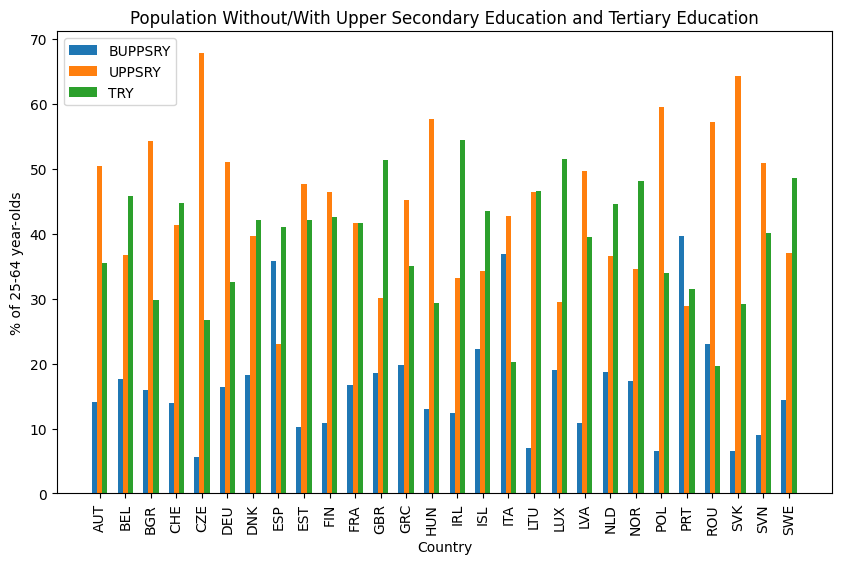

In [5]:
import matplotlib.pyplot as plt

def grouped_bar_chart_education(df):
    # Filter for only the rows with SUBJECT BUPPSRY, UPPSRY, TRY
    filtered_df = df[df['SUBJECT'].isin(['BUPPSRY', 'UPPSRY', 'TRY'])]

    # Pivot the dataframe to get the data in the required format for plotting
    pivot_df = filtered_df.pivot(index='LOCATION', columns='SUBJECT', values='OBS_VALUE')

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define bar width and positions
    bar_width = 0.2
    positions = list(range(len(pivot_df)))

    # Plot bars for BUPPSRY, UPPSRY, TRY
    ax.bar([p - bar_width for p in positions], pivot_df['BUPPSRY'], width=bar_width, label='BUPPSRY')
    ax.bar(positions, pivot_df['UPPSRY'], width=bar_width, label='UPPSRY')
    ax.bar([p + bar_width for p in positions], pivot_df['TRY'], width=bar_width, label='TRY')

    # Set the x-ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(pivot_df.index, rotation=90)

    # Adding labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel('% of 25-64 year-olds')
    ax.set_title('Population Without/With Upper Secondary Education and Tertiary Education')
    ax.legend()

    # Display the plot
    plt.show()

grouped_bar_chart_education(oecd_europe)

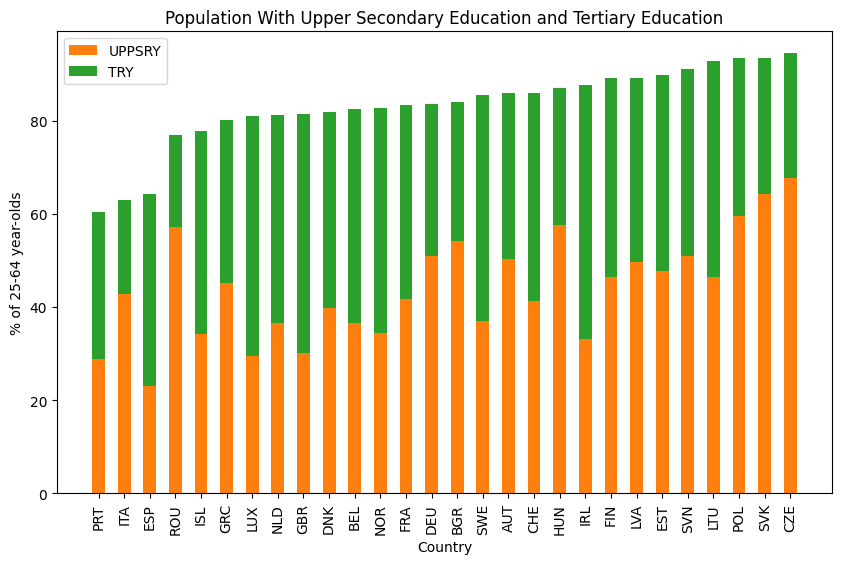

In [16]:
def stacked_bar_chart(df):
    # Filter the dataframe for UPPSRY and TRY subjects
    filtered_df = df[df['SUBJECT'].isin(['UPPSRY', 'TRY'])]

    # Pivot the dataframe to align UPPSRY and TRY subjects by LOCATION
    pivot_df = filtered_df.pivot(index='LOCATION', columns='SUBJECT', values='OBS_VALUE')

    # Drop any rows with missing values to ensure each country has both subjects
    pivot_df = pivot_df.dropna(subset=['UPPSRY', 'TRY'])

    # Calculate the total height of each bar
    pivot_df['TOTAL'] = pivot_df['UPPSRY'] + pivot_df['TRY']

    # Sort the dataframe by the total height of the bars
    pivot_df = pivot_df.sort_values(by='TOTAL') 

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define positions and bar width
    positions = list(range(len(pivot_df)))
    bar_width = 0.5

    # Plot bars for UPPSRY
    bars1 = ax.bar(positions, pivot_df['UPPSRY'], width=bar_width, label='UPPSRY', color='tab:orange')

    # Plot bars for TRY stacked on top of UPPSRY
    bars2 = ax.bar(positions, pivot_df['TRY'], width=bar_width, bottom=pivot_df['UPPSRY'], label='TRY', color='tab:green')

    # Set the x-ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(pivot_df.index, rotation=90)

    # Adding labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel('% of 25-64 year-olds')
    ax.set_title('Population With Upper Secondary Education and Tertiary Education')
    ax.legend()

    # Display the plot
    plt.show()

stacked_bar_chart(oecd_europe)

In [6]:
def single_bar_chart(df, education_level):
    if education_level == 'BUPPSRY':
        # Filter for only the rows with SUBJECT BUPPSRY
        filtered_df = df[df['SUBJECT'] == 'BUPPSRY']
    elif education_level == 'UPPSRY':
        # Filter for only the rows with SUBJECT UPPSRY
        filtered_df = df[df['SUBJECT'] == 'UPPSRY']
    elif education_level == 'TRY':
        # Filter for only the rows with SUBJECT TRY
        filtered_df = df[df['SUBJECT'] == 'TRY']
    else:
        return 'The argument education_level has to be BUPPSRY, UPPSRY or TRY!'

    # Sort the dataframe by OBS_VALUE
    if education_level == 'BUPPSRY':
        sorted_df = filtered_df.sort_values(by='OBS_VALUE', ascending=False) #descending
    else:
        sorted_df = filtered_df.sort_values(by='OBS_VALUE') #ascending

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define bar width and positions
    bar_width = 0.5
    positions = list(range(len(sorted_df)))

    # Plot bars in the same colors as before
    if education_level == 'BUPPSRY':
        ax.bar(positions, sorted_df['OBS_VALUE'], width=bar_width, color='tab:blue', label=education_level)     #blue
        ax.set_title('Population Below Upper Secondary Education')
    elif education_level == 'UPPSRY':
        ax.bar(positions, sorted_df['OBS_VALUE'], width=bar_width, color='tab:orange', label=education_level)   #orange
        ax.set_title('Population With Upper Secondary Education')
    elif education_level == 'TRY':
        ax.bar(positions, sorted_df['OBS_VALUE'], width=bar_width, color='tab:green', label=education_level)    #green
        ax.set_title('Population With Tertiary Education')

    # Set the x-ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(sorted_df['LOCATION'], rotation=90)

    # Adding labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel('% of 25-64 year-olds')
    ax.legend()

    # Display the plot
    plt.show()

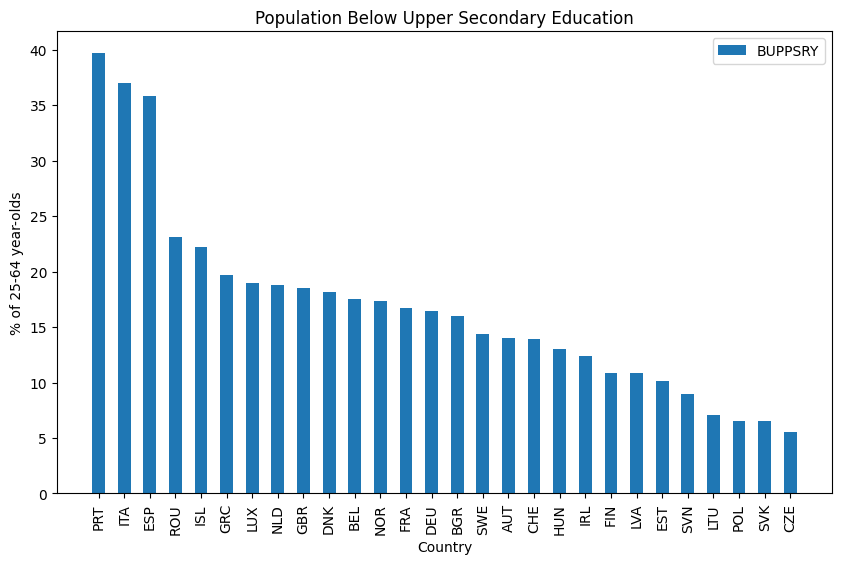

In [7]:
# Plot the bar chart for BUPPSRY
single_bar_chart(oecd_europe, education_level='BUPPSRY')

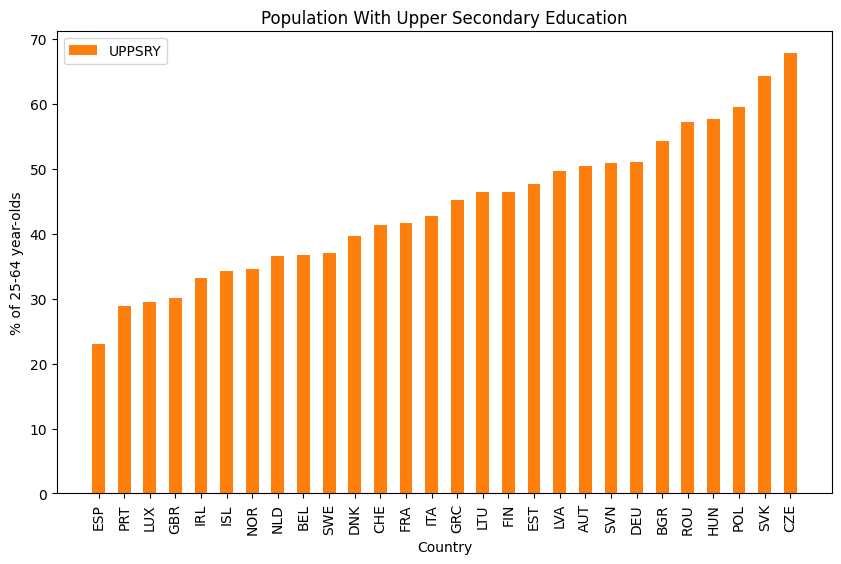

In [8]:
# Plot the bar chart for UPPSRY
single_bar_chart(oecd_europe, education_level='UPPSRY')

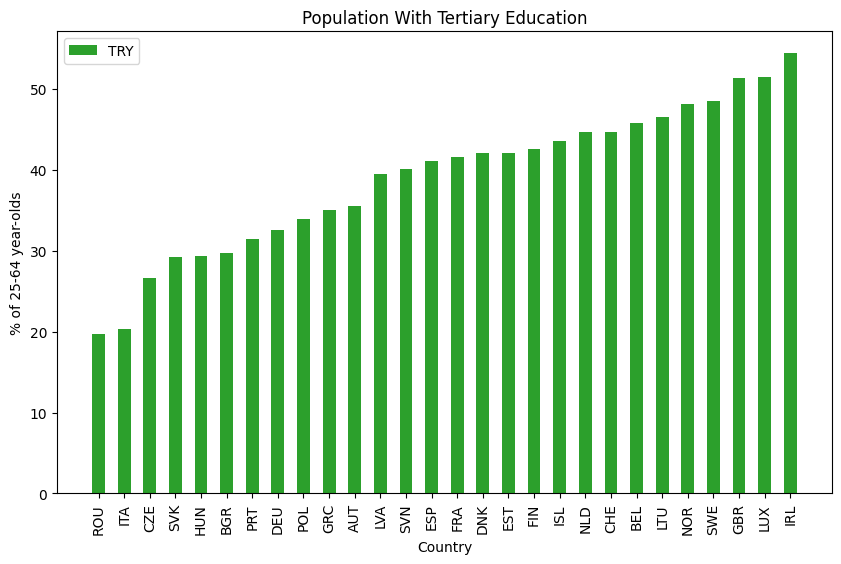

In [9]:
# Plot the bar chart for TRY
single_bar_chart(oecd_europe, education_level='TRY')

## 3. Geographic Heatmap

In [10]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def create_buppsry_heatmap(df, education_level):
    if education_level == 'BUPPSRY':
        # Filter for the rows with SUBJECT BUPPSRY
        filtered_df = df[df['SUBJECT'] == 'BUPPSRY']
        title = 'Population Below Upper Secondary Education in Europe'
    elif education_level == 'UPPSRY':
        # Filter for the rows with SUBJECT UPPSRY
        filtered_df = df[df['SUBJECT'] == 'UPPSRY']
        title = 'Population With Upper Secondary Education in Europe'
    elif education_level == 'TRY':
        # Filter for the rows with SUBJECT TRY
        filtered_df = df[df['SUBJECT'] == 'TRY']
        title = 'Population With Tertiary Education in Europe'
    else:
        return 'The argument education_level has to be BUPPSRY, UPPSRY or TRY!'
    
    # Load the world borders using geopandas
    world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

    # Create a list of distinct values in the 'LOCATION' column
    distinct_locations = filtered_df['LOCATION'].unique().tolist()

    # Filter for countries in the OECD dataset
    europe = world[world['ISO_A3'].isin(distinct_locations)]

    # Merge the BUPPSRY data with the Europe GeoDataFrame
    europe = europe.set_index('ISO_A3').join(filtered_df.set_index('LOCATION')['OBS_VALUE']).reset_index()

    # Remove rows with missing or infinite values
    europe = europe.dropna(subset=['OBS_VALUE'])
    europe = europe[np.isfinite(europe['OBS_VALUE'])]

    # Define the color scale
    if education_level == 'BUPPSRY':
        cmap = plt.colormaps.get_cmap('RdYlGn_r')   #highest values red
    else:
        cmap = plt.colormaps.get_cmap('RdYlGn')   #highest values green

    norm = colors.Normalize(vmin=europe['OBS_VALUE'].min(), vmax=europe['OBS_VALUE'].max())

    # Convert to a projected CRS for accurate centroid calculation
    europe = europe.to_crs(epsg=3395)

    # Plot the map
    fig, ax = plt.subplots(figsize=(15, 10))
    europe.boundary.plot(ax=ax, linewidth=1)
    europe.plot(column='OBS_VALUE', ax=ax, legend=False, cmap=cmap, norm=norm, 
                missing_kwds={'color': 'lightgrey', 'hatch': '//', 'label': 'Missing values'})
    
    # Create and customize the color bar
    cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar.set_array(europe['OBS_VALUE'])
    cbar = fig.colorbar(cbar, ax=ax)
    cbar.set_label('% of 25-64 year-olds', rotation=90, labelpad=-60)

    # Add country ISO3 codes
    for x, y, label in zip(europe.geometry.centroid.x, europe.geometry.centroid.y, europe['ISO_A3']):
        ax.text(x, y, label, fontsize=8, ha='center', color='black')
    
    # Customize plot appearance
    ax.set_title(title, fontsize=15)
    ax.set_axis_off()
    
    plt.show()

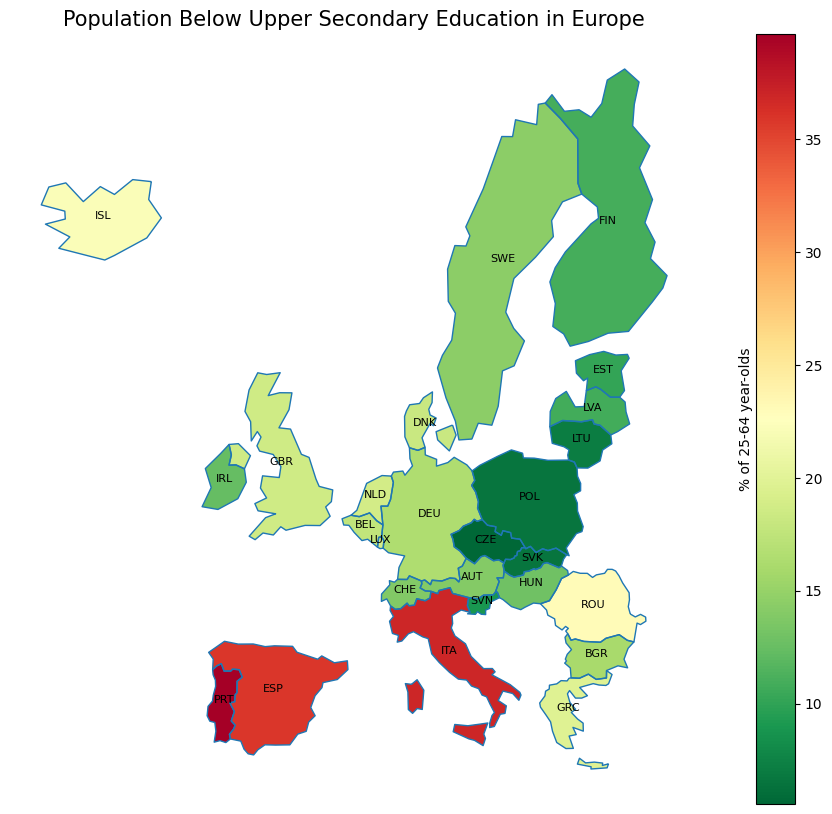

In [11]:
# Create the heatmap for BUPPSRY
create_buppsry_heatmap(oecd_europe, education_level='BUPPSRY')

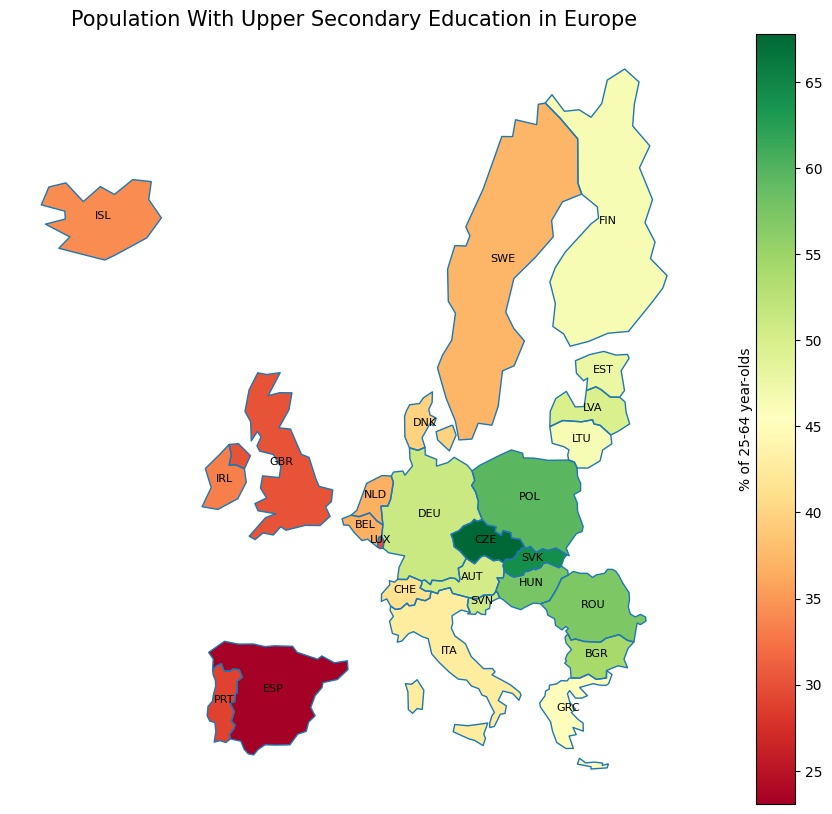

In [12]:
# Create the heatmap for UPPSRY
create_buppsry_heatmap(oecd_europe, education_level='UPPSRY')

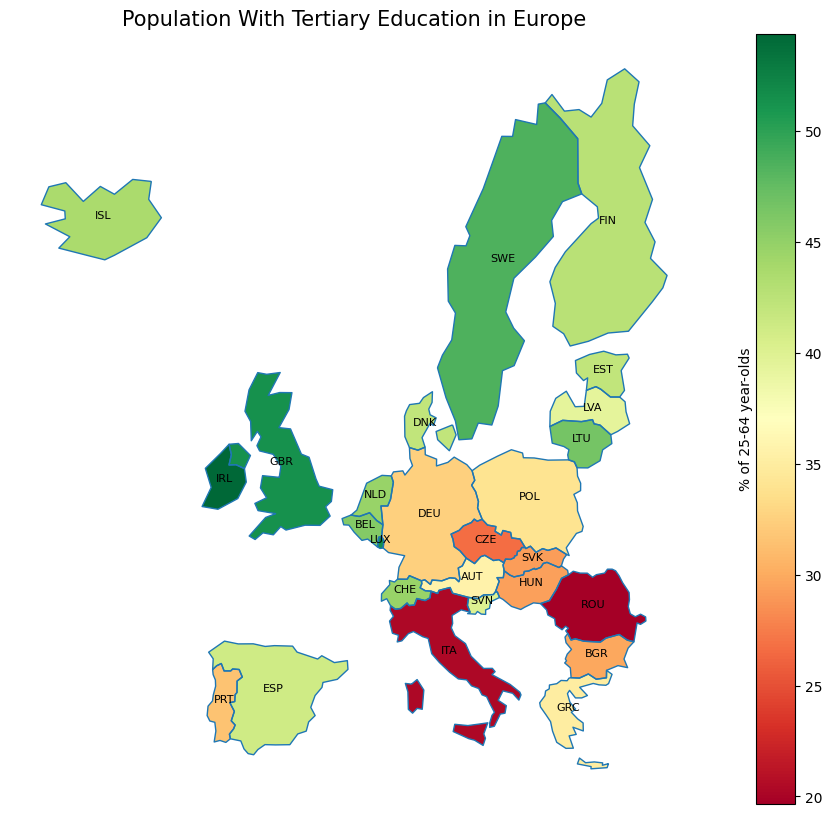

In [13]:
# Create the heatmap for TRY
create_buppsry_heatmap(oecd_europe, education_level='TRY')